In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from tools.utils.sqlite_utils import create_connection

import pandas as pd

In [2]:
conn = create_connection('../dataset/CVEfixes_v1.0.8/Data/DB.db')

In [3]:
# query = f"""
# SELECT
#         f.file_change_id,
#         f.programming_language,
#         cwe.cwe_id,
#         f.code_after AS non_vuln_code,
#         f.code_before AS vuln_code,
#         cwe.description AS cwe_description,
#         f.diff_parsed,
#         cve.description AS cve_description,
#         f.token_count
# FROM file_change f
#         INNER JOIN fixes
#                 ON f.hash = fixes.hash
#         INNER JOIN cve
#                 ON fixes.cve_id = cve.cve_id
#         INNER JOIN cwe_classification
#                 ON cve.cve_id = cwe_classification.cve_id
#         INNER JOIN cwe
#                 ON cwe_classification.cwe_id = cwe.cwe_id
# WHERE
#         f.num_lines_added<=1
#         AND f.num_lines_deleted<=1
#         AND f.programming_language IS NOT NULL
#         AND cwe.cwe_id IS NOT NULL
#         AND cwe.cwe_name IS NOT NULL
#         AND f.code_before IS NOT NULL
#         AND cwe.description IS NOT NULL
#         AND f.diff_parsed IS NOT NULL
#         AND cve.description IS NOT NULL
#         AND f.token_count IS NOT NULL;
#     """
# df = pd.read_sql(query, con=conn)

In [4]:
# # Visualize Programming Language Distribution with matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns

# chosen_cwes = ['CWE-79', 'CWE-89', 'CWE-434', 'CWE-352']

# plt.figure(figsize=(10, 6))
# sns.countplot(data=df[df['cwe_id'].isin(chosen_cwes)], x='programming_language', order=df['programming_language'].value_counts().index)
# plt.title('Programming Language Distribution')
# plt.xlabel('Programming Language')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

<Figure size 1008x504 with 0 Axes>

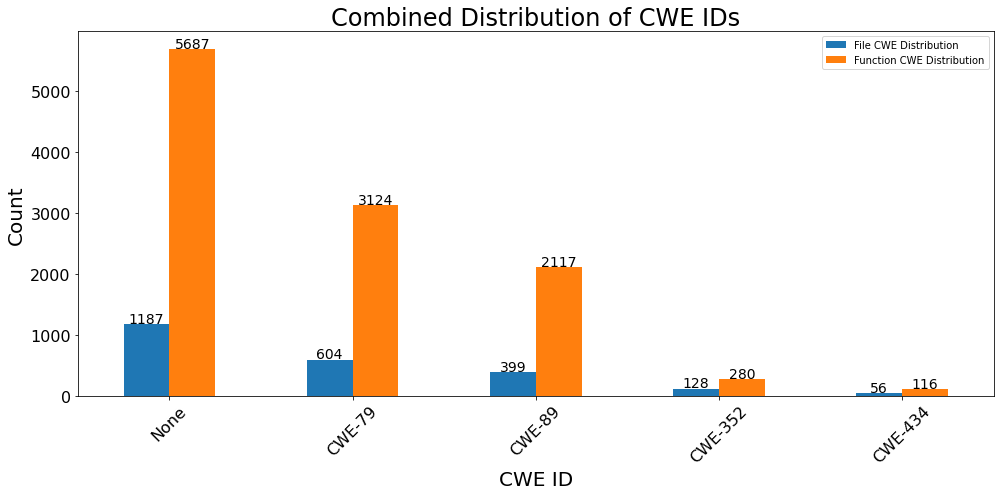

<Figure size 1008x504 with 0 Axes>

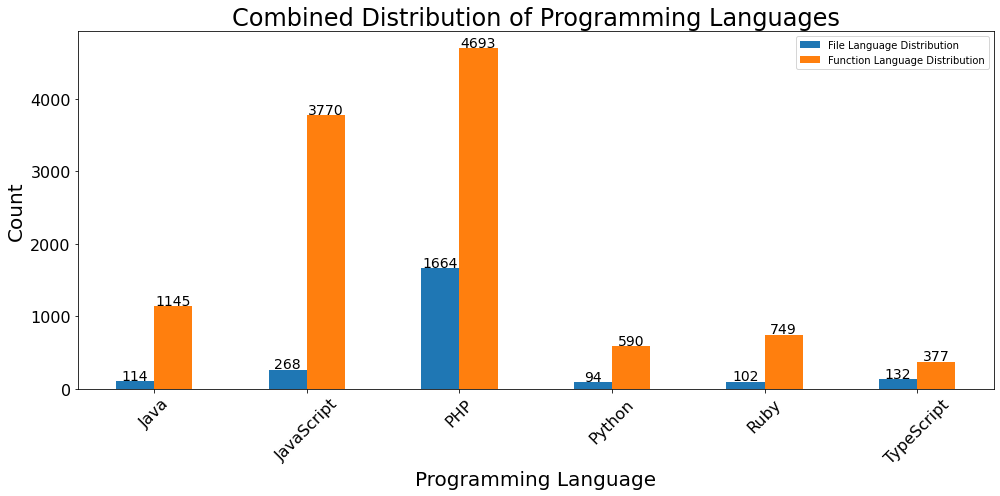

In [7]:
def visualize_cwe_distribution_combined(file_df, func_df):
  plt.figure(figsize=(14, 7))
  
  # Count CWE IDs in both dataframes
  file_cwe_counts = file_df['label'].value_counts()
  func_cwe_counts = func_df['label'].value_counts()
  
  # Combine counts into a single dataframe
  combined_df = pd.DataFrame({
    'File CWE Distribution': file_cwe_counts,
    'Function CWE Distribution': func_cwe_counts
  }).fillna(0)
  
  # Plot the combined distribution
  ax = combined_df.plot(kind='bar', figsize=(14, 7))
  plt.title('Combined Distribution of CWE IDs', fontsize=24)
  plt.xlabel('CWE ID', fontsize=20)
  plt.ylabel('Count', fontsize=20)
  plt.xticks(rotation=45, fontsize=16)
  plt.yticks(fontsize=16)
  
  # Add numbers on top of each bar
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
          (p.get_x() + p.get_width() / 2., p.get_height()), 
          ha='center', va='center', 
          xytext=(0, 5), 
          textcoords='offset points', fontsize=14)
  
  plt.tight_layout()
  plt.show()


def visualize_combined_language_distribution(file_df, func_df):
  plt.figure(figsize=(14, 7))
  
  # Count programming languages in both dataframes
  file_lang_counts = file_df['programming_language'].value_counts()
  func_lang_counts = func_df['programming_language'].value_counts()
  
  # Combine counts into a single dataframe
  combined_lang_df = pd.DataFrame({
    'File Language Distribution': file_lang_counts,
    'Function Language Distribution': func_lang_counts
  }).fillna(0)
  
  # Plot the combined distribution
  ax = combined_lang_df.plot(kind='bar', figsize=(14, 7))
  plt.title('Combined Distribution of Programming Languages', fontsize=24)
  plt.xlabel('Programming Language', fontsize=20)
  plt.ylabel('Count', fontsize=20)
  plt.xticks(rotation=45, fontsize=16)
  plt.yticks(fontsize=16)
  
  # Add numbers on top of each bar
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
          (p.get_x() + p.get_width() / 2., p.get_height()), 
          ha='center', va='center', 
          xytext=(0, 5), 
          textcoords='offset points', fontsize=14)
  
  plt.tight_layout()
  plt.show()


visualize_cwe_distribution_combined(file_df, func_df)
visualize_combined_language_distribution(file_df, func_df)


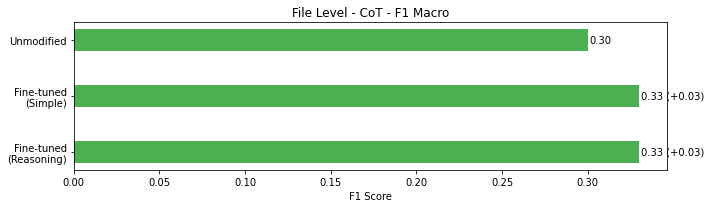

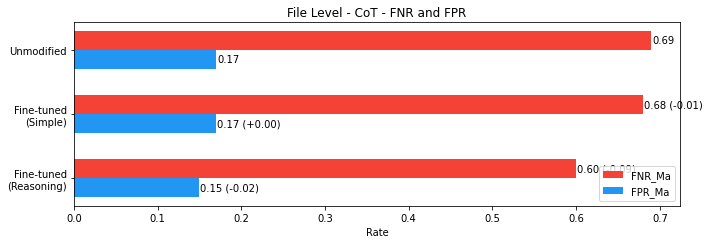

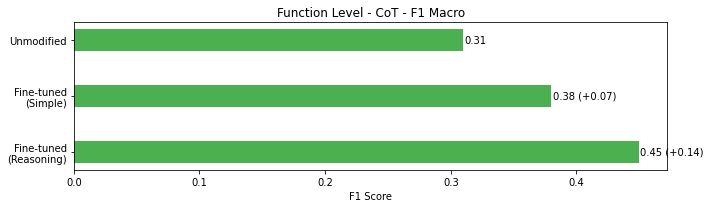

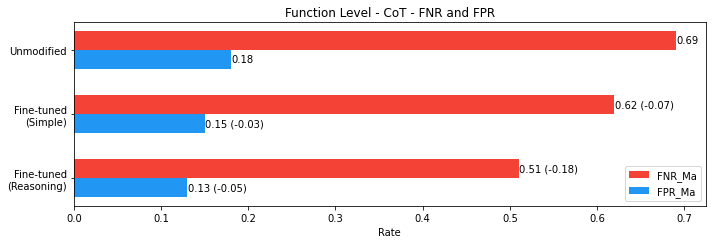

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data for type 1
labels = [
    "Unmodified",
    "Fine-tuned\n(Simple)",
    "Fine-tuned\n(Reasoning)"
]
f1_ma_1 = [0.30, 0.33, 0.33]
fnr_ma_1 = [0.69, 0.68, 0.60]
fpr_ma_1 = [0.17, 0.17, 0.15]

# Data for type 2
f1_ma_2 = [0.31, 0.38, 0.45]
fnr_ma_2 = [0.69, 0.62, 0.51]
fpr_ma_2 = [0.18, 0.15, 0.13]

def format_with_diff(values):
    base = values[0]
    return [f"{v:.2f} ({v - base:+.2f})" for v in values]

def plot_f1_bar(title, labels, f1_ma):
    x = np.arange(len(labels))
    height = 0.4
    diff_labels = format_with_diff(f1_ma)

    fig, ax = plt.subplots(figsize=(10, 3))
    bars = ax.barh(x, f1_ma, height, color='#4caf50', label='F1')

    ax.set_xlabel('F1 Score')
    ax.set_title(title + ' - F1 Macro')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()

    for i, bar in enumerate(bars):
        width = bar.get_width()
        if i == 0:
            ax.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')
        else:
          ax.text(width + 0.001, bar.get_y() + bar.get_height()/2, diff_labels[i] , va='center')



    plt.tight_layout()
    plt.show()

def plot_fnr_fpr_bar(title, labels, fnr_ma, fpr_ma):
    x = np.arange(len(labels))
    height = 0.3  # Total height to be split between FNR and FPR
    gap = 0  # Set gap between bars to zero
    bar_thickness = height  # Each bar takes half the height

    fnr_diff_labels = format_with_diff(fnr_ma)
    fpr_diff_labels = format_with_diff(fpr_ma)

    fig, ax = plt.subplots(figsize=(10, 3.5))
    
    # Plot bars at same center but with half-height offset (no gap)
    ax.barh(x - bar_thickness / 2, fnr_ma, height=bar_thickness, label='FNR_Ma', color='#f44336')
    ax.barh(x + bar_thickness / 2, fpr_ma, height=bar_thickness, label='FPR_Ma', color='#2196f3')

    ax.set_xlabel('Rate')
    ax.set_title(title + ' - FNR and FPR')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    ax.legend()

    for i in range(len(labels)):
        ax.text(fnr_ma[i] + 0.001, x[i] - bar_thickness / 2, 
                f'{fnr_ma[i]:.2f}' if i == 0 else fnr_diff_labels[i], va='center')
        ax.text(fpr_ma[i] + 0.001, x[i] + bar_thickness / 2, 
                f'{fpr_ma[i]:.2f}' if i == 0 else fpr_diff_labels[i], va='center')

    plt.tight_layout()
    plt.show()



# Plot Data Type 1
plot_f1_bar("File Level - CoT", labels, f1_ma_1)
plot_fnr_fpr_bar("File Level - CoT", labels, fnr_ma_1, fpr_ma_1)

# Plot Data Type 2
plot_f1_bar("Function Level - CoT", labels, f1_ma_2)
plot_fnr_fpr_bar("Function Level - CoT", labels, fnr_ma_2, fpr_ma_2)


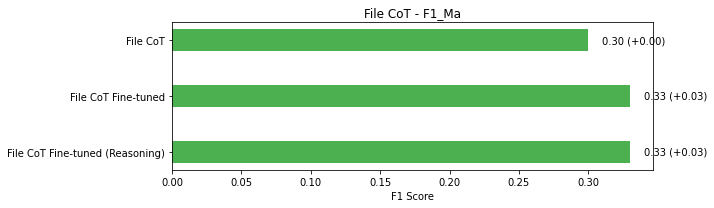

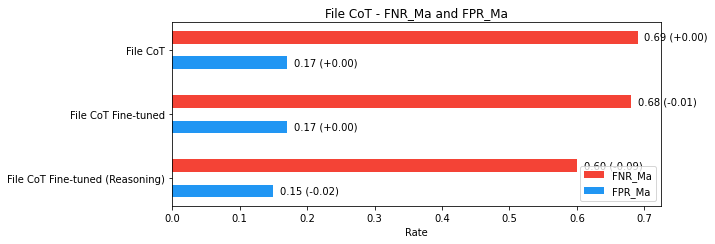

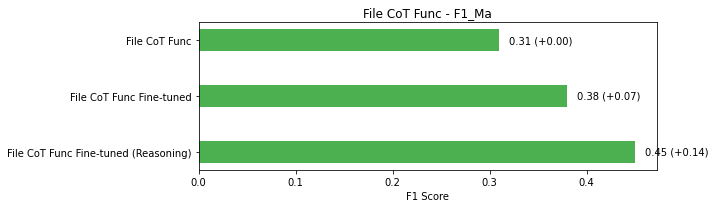

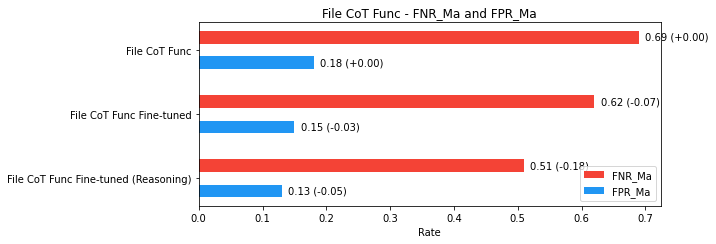

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data for type 1
labels1 = [
    "File CoT",
    "File CoT Fine-tuned",
    "File CoT Fine-tuned (Reasoning)"
]
f1_ma_1 = [0.30, 0.33, 0.33]
fnr_ma_1 = [0.69, 0.68, 0.60]
fpr_ma_1 = [0.17, 0.17, 0.15]

# Data for type 2
labels2 = [
    "File CoT Func",
    "File CoT Func Fine-tuned",
    "File CoT Func Fine-tuned (Reasoning)"
]
f1_ma_2 = [0.31, 0.38, 0.45]
fnr_ma_2 = [0.69, 0.62, 0.51]
fpr_ma_2 = [0.18, 0.15, 0.13]

def format_with_diff(values):
    base = values[0]
    return [f"{v:.2f} ({v - base:+.2f})" for v in values]

def plot_f1_bar(title, labels, f1_ma):
    x = np.arange(len(labels))
    height = 0.4
    diff_labels = format_with_diff(f1_ma)

    fig, ax = plt.subplots(figsize=(10, 3))
    bars = ax.barh(x, f1_ma, height, color='#4caf50', label='F1_Ma')

    ax.set_xlabel('F1 Score')
    ax.set_title(title + ' - F1_Ma')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, diff_labels[i], va='center')

    plt.tight_layout()
    plt.show()

def plot_fnr_fpr_bar(title, labels, fnr_ma, fpr_ma):
    x = np.arange(len(labels))
    height = 0.2
    fnr_diff_labels = format_with_diff(fnr_ma)
    fpr_diff_labels = format_with_diff(fpr_ma)

    fig, ax = plt.subplots(figsize=(10, 3.5))
    bars1 = ax.barh(x - height, fnr_ma, height, label='FNR_Ma', color='#f44336')
    bars2 = ax.barh(x + height, fpr_ma, height, label='FPR_Ma', color='#2196f3')

    ax.set_xlabel('Rate')
    ax.set_title(title + ' - FNR_Ma and FPR_Ma')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    ax.legend()

    for i in range(len(labels)):
        ax.text(fnr_ma[i] + 0.01, i - height, fnr_diff_labels[i], va='center')
        ax.text(fpr_ma[i] + 0.01, i + height, fpr_diff_labels[i], va='center')

    plt.tight_layout()
    plt.show()

# Plot Data Type 1
plot_f1_bar("File CoT", labels1, f1_ma_1)
plot_fnr_fpr_bar("File CoT", labels1, fnr_ma_1, fpr_ma_1)

# Plot Data Type 2
plot_f1_bar("File CoT Func", labels2, f1_ma_2)
plot_fnr_fpr_bar("File CoT Func", labels2, fnr_ma_2, fpr_ma_2)
